# A Deep Neural Network Regressor 2

My first stab at this task will be to implement an **DNN Regressor** model.

In [1]:
%matplotlib inline

#Basic Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sklearn Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# df = pd.read_csv('data_new/train.csv',header=None)
# print df.info()
# df.head()

In [3]:
# Data load function
def load_data(filename):
    data   = pd.read_csv(filename,header=None)
    x_data = data.iloc[:,:-1].values
    y_data = data.iloc[:,-1].values
#     print 'X shape:', x_data.shape
#     print 'Y shape:', y_data.shape
    return x_data,y_data

In [4]:
filename = 'data_new/train.csv'
x_train,y_train=load_data(filename)
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.3,random_state=32)

## Regressor Model

In [5]:
# Keras Imports
# Keras Imports
from keras.models import Model, load_model
from keras.layers import Input, Dense, Lambda
from keras.layers import Flatten, Reshape, GaussianDropout
from keras.layers.advanced_activations import PReLU
from keras import backend as K
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [6]:
# Parameters
ndim = x_train.shape[1]
L1   = 320
L2   = 256
L3   = 100
L4   = 32

In [7]:
# Build DNN
def build_model():
    x = Input(shape=(ndim,),name='Input')
    h = Dense(L1,activation=PReLU(),name='L1')(x)
    h = Dense(L2,activation=PReLU(),name='L2')(h)
    h = Dense(L3,activation=PReLU(),name='L3')(h)
    h = Dense(L4,activation=PReLU(),name='L4')(h)
    y = Dense(1,activation='linear',name='Output')(h)
    model = Model(x,y)
    return model

In [8]:
# Compile Model
model = build_model()
model.summary()
model.compile(optimizer='adam',loss='mean_squared_error')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 6720)              0         
_________________________________________________________________
L1 (Dense)                   (None, 320)               2150720   
_________________________________________________________________
L2 (Dense)                   (None, 256)               82176     
_________________________________________________________________
L3 (Dense)                   (None, 100)               25700     
_________________________________________________________________
L4 (Dense)                   (None, 32)                3232      
_________________________________________________________________
Output (Dense)               (None, 1)                 33        
Total params: 2,261,861
Trainable params: 2,261,861
Non-trainable params: 0
_________________________________________________________________


/Users/d30676n/anaconda/envs/deeplearn/lib/python2.7/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as PReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [9]:
# Train Model
log = model.fit(x_train, y_train,
              batch_size=30,
              epochs=30,
              shuffle=True,
              validation_data=(x_valid,y_valid))

Train on 554 samples, validate on 238 samples
Epoch 1/30
554/554 [==============================] - 0s - loss: 3979.2011 - val_loss: 1443.7149
Epoch 2/30
554/554 [==============================] - 0s - loss: 1027.7155 - val_loss: 843.0190
Epoch 3/30
554/554 [==============================] - 0s - loss: 662.9595 - val_loss: 573.9366
Epoch 4/30
554/554 [==============================] - 0s - loss: 458.9514 - val_loss: 362.6792
Epoch 5/30
554/554 [==============================] - 0s - loss: 289.1494 - val_loss: 244.8397
Epoch 6/30
554/554 [==============================] - 0s - loss: 202.3247 - val_loss: 187.0567
Epoch 7/30
554/554 [==============================] - 0s - loss: 156.9008 - val_loss: 153.8633
Epoch 8/30
554/554 [==============================] - 0s - loss: 126.3563 - val_loss: 120.7262
Epoch 9/30
554/554 [==============================] - 0s - loss: 95.3663 - val_loss: 86.7471
Epoch 10/30
554/554 [==============================] - 0s - loss: 64.2772 - val_loss: 50.0401
Epoc

In [10]:
# model.save('model.h5')

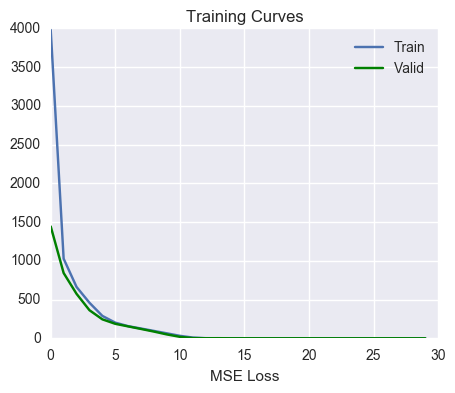

In [11]:
# Training Curves
plt.figure(figsize=(5,4))
plt.plot(log.epoch,log.history['loss'])
plt.plot(log.epoch,log.history['val_loss'],'g')
plt.title('Training Curves')
plt.xlabel('Epochs')
plt.xlabel('MSE Loss')
plt.legend(['Train','Valid'])

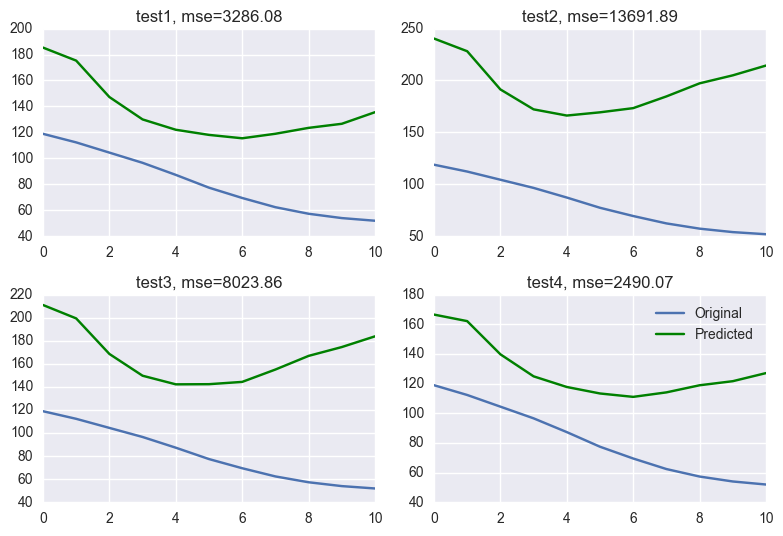

In [12]:
# Generate Predictions for Test Set
for i in range(4):
    fname = 'data_new/test{}.csv'.format(i+1) 
    x_test,y_test=load_data(fname)
    y_predict = model.predict(x_test)
    loss = model.evaluate(x_test,y_test,verbose=0)
    
    plt.subplot(221+i)
    plt.plot(y_test)
    plt.plot(y_predict,'g')
    header = '{0}, mse={1:.02f}'.format(fname[9:-4],loss)
    plt.title(header)
    
    oname = 'data_new/ypred{}.csv'.format(i+1)
    tname = 'data_new/ytest{}.csv'.format(i+1)
    np.savetxt(oname,y_predict,delimiter=',')
    np.savetxt(tname,y_test,delimiter=',')
    
plt.legend(['Original','Predicted'],loc=1)
plt.tight_layout()

----